In [232]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary, regressionSummary


## 11.1

In [6]:
df = pd.read_excel('D:/숙탯 2기/11.1 data.xlsx')
df

,Year,Salary,credit_rating
0,4,43,0
1,18,65,1
2,1,53,0
3,3,95,0
4,15,88,1
5,6,112,1


In [27]:
predictors = ['Year', 'Salary']
outcome = 'credit_rating'

X = df[predictors]
y = df[outcome]
classes = sorted(y.unique())

clf = MLPClassifier(max_iter=1, hidden_layer_sizes=(2, ), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(X, y)
clf.predict(X)

# Network structure
print('Intercepts')
print(clf.intercepts_)

print('Weights')
print(clf.coefs_)

# Prediction
print(pd.concat([
    df,
    pd.DataFrame(clf.predict_proba(X), columns=classes)
], axis=1))

Intercepts
[array([-0.49956261, -0.57651955]), array([-0.00343791])]
Weights
[array([[-0.11734092,  0.3115659 ],
       [-0.70689875, -0.27949775]]), array([[-0.51230139],
       [-0.25218468]])]
   Year  Salary  credit_rating         0         1
0     4      43              0  0.500860  0.499140
1    18      65              1  0.500860  0.499140
2     1      53              0  0.500859  0.499141
3     3      95              0  0.500859  0.499141
4    15      88              1  0.500859  0.499141
5     6     112              1  0.500859  0.499141


C:\Users\judyj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [28]:
classificationSummary(y, clf.predict(X), class_names=classes)

Confusion Matrix (Accuracy 0.5000)

       Prediction
Actual 0 1
     0 3 0
     1 3 0


## 11.2

오차(연결강도 갱신에 사용됨)

## 11.3

In [249]:
car_df = pd.read_csv('D:\숙탯 2기\dmba-datasets\ToyotaCorolla.csv')
car_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [156]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


In [67]:
car_df.Automatic.unique()

array([0, 1], dtype=int64)

In [68]:
car_df.Doors.unique()

array([3, 5, 4, 2], dtype=int64)

In [70]:
car_df.Mfr_Guarantee.unique()

array([0, 1], dtype=int64)

In [71]:
car_df.Airco.unique()

array([0, 1], dtype=int64)

In [72]:
car_df.Guarantee_Period.unique()

array([ 3, 12, 18, 13, 20, 24, 28, 36,  6], dtype=int64)

In [73]:
car_df.Automatic_airco.unique()

array([0, 1], dtype=int64)

In [74]:
car_df.CD_Player.unique()

array([0, 1], dtype=int64)

In [75]:
car_df.Powered_Windows.unique()

array([1, 0], dtype=int64)

In [76]:
car_df.Sport_Model.unique()

array([0, 1], dtype=int64)

In [77]:
car_df.Tow_Bar.unique()

array([0, 1], dtype=int64)

In [251]:
car_df.Fuel_Type = car_df.Fuel_Type.astype('category')
car_df.Fuel_Type.unique()

['Diesel', 'Petrol', 'CNG']
Categories (3, object): ['Diesel', 'Petrol', 'CNG']

In [252]:
processed = pd.get_dummies(car_df, columns = ['Fuel_Type']).drop(columns=['Fuel_Type_CNG'])

In [159]:
processed.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Parking_Assistant', 'Tow_Bar', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [260]:
cols = ['Age_08_04', 'KM', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'HP', 'Doors', 'Quarterly_Tax', 'Guarantee_Period', 'Automatic',
        'Mfr_Guarantee', 'Airco', 'Automatic_airco', 'CD_Player','Powered_Windows', 'Sport_Model', 'Tow_Bar', 'Price']

from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
processed = minmax_scaler.fit_transform(processed[cols])
processed = pd.DataFrame(processed, columns=cols)

In [254]:
processed.head()

,Age_08_04,KM,Fuel_Type_Diesel,Fuel_Type_Petrol,HP,Doors,Quarterly_Tax,Guarantee_Period,Automatic,Mfr_Guarantee,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Price
0,0.278481,0.193355,1.0,0.0,0.170732,0.333333,0.723485,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.325044
1,0.278481,0.300149,1.0,0.0,0.170732,0.333333,0.723485,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.333925
2,0.291139,0.171647,1.0,0.0,0.170732,0.333333,0.723485,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341030
3,0.316456,0.197528,1.0,0.0,0.170732,0.333333,0.723485,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376554
4,0.367089,0.158433,1.0,0.0,0.170732,0.333333,0.723485,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.333925


In [263]:
outcome = 'Price'
predictors = [c for c in processed.columns if c != outcome]


import numpy as np

# partition data
X = processed[predictors]
y = np.asarray(processed[outcome], dtype="|S6")
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


# X = processed[predictors]
# y = processed[outcome]
# train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [265]:
# train neural network with 16 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=(16, ), activation='logistic', solver='lbfgs',
                    random_state=1)
clf.fit(train_X, train_y)

# training performance
regressionSummary(train_y, clf.predict(train_X))

# validation performance
regressionSummary(valid_y, clf.predict(valid_X))

C:\Users\judyj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('S9'), dtype('S9')) -> dtype('S9')

## 11.4

In [234]:
post_df = pd.read_csv('D:\숙탯 2기\dmba-datasets\EastWestAirlinesNN.csv')
post_df.head()

,ID#,Topflight,Balance,Qual_miles,cc1_miles?,cc2_miles?,cc3_miles?,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Online_12,Email,Club_member,Any_cc_miles_12mo,Phone_sale
0,1.0,0.0,28143.0,0.0,0.0,1.0,0.0,174.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.0,0.0,19244.0,0.0,0.0,0.0,0.0,215.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,41354.0,0.0,1.0,0.0,0.0,4123.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,4.0,0.0,14776.0,0.0,0.0,0.0,0.0,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,1.0,97752.0,0.0,1.0,0.0,0.0,43300.0,26.0,2077.0,4.0,0.0,1.0,0.0,1.0,0.0


### a.

In [169]:
post_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID#                4985 non-null   float64
 1   Topflight          4985 non-null   float64
 2   Balance            4985 non-null   float64
 3   Qual_miles         4985 non-null   float64
 4   cc1_miles?         4985 non-null   float64
 5   cc2_miles?         4985 non-null   float64
 6   cc3_miles?         4985 non-null   float64
 7   Bonus_miles        4986 non-null   float64
 8   Bonus_trans        4986 non-null   float64
 9   Flight_miles_12mo  4985 non-null   float64
 10  Flight_trans_12    4985 non-null   float64
 11  Online_12          4985 non-null   float64
 12  Email              4985 non-null   float64
 13  Club_member        4985 non-null   float64
 14  Any_cc_miles_12mo  4985 non-null   float64
 15  Phone_sale         4985 non-null   float64
dtypes: float64(16)
memory us

In [170]:
post_df.Topflight.unique()

array([ 0.,  1., nan])

In [171]:
post_df.Qual_miles.unique()

array([    0.,  2024.,   500.,   967.,  5031.,  1182.,  1776.,  1745.,
         733.,  2398.,  1250.,  2706.,  2998.,  2556.,  6727.,  1374.,
        1952.,  2000.,  1178.,  7210.,  2015.,  2066.,  2128.,  2919.,
        1024.,   589.,  2880.,  3445.,   862.,  8264.,  1604.,  2975.,
         588.,  1199.,  2586.,  3490.,  5051.,  1115.,   810.,  4081.,
        2376.,   948.,  6286.,  2253.,  2565.,  2643.,  8559.,  3818.,
        8753.,  9325.,  4301.,  1094.,  3692.,  1896.,  1000.,  1388.,
        4116.,  2505., 11148.,   888., 10098.,   745.,  5124.,  2408.,
         867.,  1846.,  1514.,  8019.,   763.,  4924.,  1697.,  1739.,
        2370.,  6168.,   925.,  2288.,  1467.,  1704.,  2329.,  1099.,
        1505.,  6920.,  2139.,  4481.,  1448.,   250.,   783.,  2360.,
        2364.,  2396.,  1362.,  5583.,  1440.,  5009.,   909.,  2395.,
        3867.,  1452.,  6057.,  2081.,  1112.,  2704.,  7663.,  3953.,
        5513.,  2454.,   957.,  4704.,  7558.,  2562.,  4727.,  5368.,
      

In [173]:
post_df['cc1_miles?'].unique()

array([ 0.,  1., nan])

In [177]:
post_df.Email.unique()

array([ 1.,  0., nan])

In [179]:
post_df.Club_member.unique()

array([ 0.,  1., nan])

In [180]:
post_df.Any_cc_miles_12mo.unique()

array([ 1.,  0., nan])

In [181]:
post_df.Phone_sale.unique()

array([ 0.,  1., nan])

In [235]:
post_df.Topflight = post_df.Topflight.astype('category')
# post_df['cc1_miles?'] = post_df['cc1_miles?'].astype('category')
post_df.Email = post_df.Email.astype('category')
post_df.Club_member = post_df.Club_member.astype('category')
post_df.Any_cc_miles_12mo = post_df.Any_cc_miles_12mo.astype('category')
post_df.Phone_sale = post_df.Phone_sale.astype('category')

In [236]:
processed = pd.get_dummies(post_df, drop_first = True)

In [237]:
processed.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles?', 'cc2_miles?',
       'cc3_miles?', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo',
       'Flight_trans_12', 'Online_12', 'Topflight_1.0', 'Email_1.0',
       'Club_member_1.0', 'Any_cc_miles_12mo_1.0', 'Phone_sale_1.0'],
      dtype='object')

In [238]:
processed = minmax_scaler.fit_transform(processed)
processed = pd.DataFrame(processed)

In [239]:
processed = pd.DataFrame(processed)

In [240]:
processed.columns = ['ID#', 'Balance', 'Qual_miles', 'cc2_miles?', 'cc3_miles?',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Online_12', 'Topflight_1.0', 'cc1_miles?_1.0', 'Email_1.0',
       'Club_member_1.0', 'Any_cc_miles_12mo_1.0', 'Phone_sale_1.0']

processed

,ID#,Balance,Qual_miles,cc2_miles?,cc3_miles?,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Online_12,Topflight_1.0,cc1_miles?_1.0,Email_1.0,Club_member_1.0,Any_cc_miles_12mo_1.0,Phone_sale_1.0
0,0.000000,0.016508,0.000000,0.0,1.0,0.0,0.000660,0.000201,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0
1,0.000200,0.011288,0.000000,0.0,0.0,0.0,0.000815,0.000401,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000399,0.024257,0.000000,1.0,0.0,0.0,0.015636,0.000802,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0
3,0.000599,0.008667,0.000000,0.0,0.0,0.0,0.001896,0.000201,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000799,0.057338,0.000000,1.0,0.0,0.0,0.164211,0.005216,0.067398,0.075472,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,0.999601,0.005873,0.218515,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
4983,0.999800,0.002834,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
4984,1.000000,0.000293,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [241]:
outcome = 'Phone_sale_1.0'
predictors = [c for c in processed.columns if c != outcome]


# # partition data
# X = processed[predictors]
# y = np.asarray(processed[outcome], dtype="|S6")
# train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


X = processed[predictors]
y = processed[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [242]:
# train neural network with 16 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=(5, ), activation='logistic', solver='lbfgs',
                    random_state=1)
clf.fit(train_X, train_y)

# training performance
classificationSummary(train_y, clf.predict(train_X))

# validation performance
classificationSummary(valid_y, clf.predict(valid_X))

Confusion Matrix (Accuracy 0.8747)

       Prediction
Actual    0    1
     0 2594   12
     1  363   23


C:\Users\judyj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [213]:
processed.isna().sum()

ID#                      2
Balance                  2
Qual_miles               2
cc2_miles?               2
cc3_miles?               2
Bonus_miles              1
Bonus_trans              1
Flight_miles_12mo        2
Flight_trans_12          2
Online_12                2
Topflight_1.0            0
cc1_miles?_1.0           0
Email_1.0                0
Club_member_1.0          0
Any_cc_miles_12mo_1.0    0
Phone_sale_1.0           0
dtype: int64

In [243]:
processed.dropna(inplace = True)

In [244]:
outcome = 'Phone_sale_1.0'
predictors = [c for c in processed.columns if c != outcome]


# # partition data
# X = processed[predictors]
# y = np.asarray(processed[outcome], dtype="|S6")
# train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


X = processed[predictors]
y = processed[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [245]:
# train neural network with 5 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=(5, ), activation='logistic', solver='lbfgs',
                    random_state=1)
clf.fit(train_X, train_y)

# training performance
classificationSummary(train_y, clf.predict(train_X))

# validation performance
classificationSummary(valid_y, clf.predict(valid_X))

Confusion Matrix (Accuracy 0.8756)

       Prediction
Actual    0    1
     0 2611    2
     1  370    8
Confusion Matrix (Accuracy 0.8591)

       Prediction
Actual    0    1
     0 1710    7
     1  274    3


C:\Users\judyj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


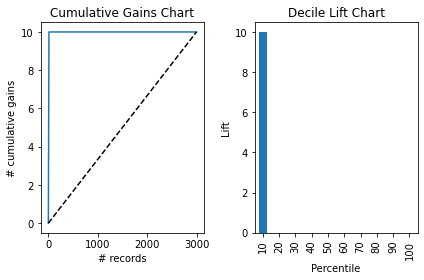

In [246]:
import matplotlib.pylab as plt
from dmba import liftChart, gainsChart


# 학습 데이터
pred_v = pd.Series(clf.predict(train_X))
pred_v = pred_v.sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_title('Cumulative Gains Chart')

ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

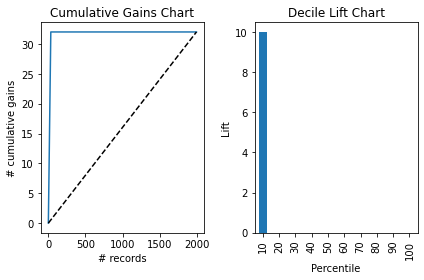

In [226]:
# 검증 데이터

pred_v = pd.Series(clf.predict(valid_X))
pred_v = pred_v.sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_title('Cumulative Gains Chart')

ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

### c.

In [228]:
# train neural network with 1 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=(1, ), activation='logistic', solver='lbfgs',
                    random_state=1)
clf.fit(train_X, train_y)

# training performance
classificationSummary(train_y, clf.predict(train_X))

# validation performance
classificationSummary(valid_y, clf.predict(valid_X))

Confusion Matrix (Accuracy 0.8736)

       Prediction
Actual    0    1
     0 2613    0
     1  378    0
Confusion Matrix (Accuracy 0.8611)

       Prediction
Actual    0    1
     0 1717    0
     1  277    0
